# Implementing the SARIMA model on abiotic data

In [97]:
import pandas as pd
import numpy as np

## 1. Importing the data

In [98]:
merged_df = pd.read_excel('../../data/MERGED_DATA_INTERPOLATED2.xlsx', sheet_name='MERGE')
display(merged_df.head(10))

LOC_CODE      DATUM      TIJD  ZS [mg/l]  ZICHT [dm]  T [oC]  SiO2 [umol/L]  \
0  DANTZGT 1990-01-10  15:00:00      135.0         2.0     4.0      20.178571   
1  DANTZGT 1990-02-06  13:40:00      295.0         0.5     6.0      19.803571   
2  DANTZGT 1990-03-08  13:45:00      103.0         3.0     7.3      19.428571   
3  DANTZGT 1990-04-04  10:00:00      113.0         3.0     8.2       6.285714   
4  DANTZGT 1990-05-09  15:30:00       20.0        11.0    17.4       1.714286   
5  DANTZGT 1990-06-20  13:00:00       33.0        10.0    18.1       8.607143   
6  DANTZGT 1990-07-18  12:15:00       39.0         4.0    17.0       6.071429   
7  DANTZGT 1990-08-15  09:40:00       15.0         8.0    21.0       3.714286   
8  DANTZGT 1990-09-19  16:25:00       29.0         3.0    15.1       9.607143   
9  DANTZGT 1990-10-17  15:15:00       65.0         4.0    13.8      10.142857   

   SALNTT [DIMSLS]  PO4 [umol/L]  pH [DIMSLS]  ...  Pde  Plo  Dpu  Rte  Fja  \
0            29.19      1.645161          7.8  ...  NaN  NaN  NaN  NaN  NaN   
1            27.37      1.177419          7.9  ...  NaN  NaN  NaN  NaN  NaN   
2            24.99      0.709677          8.0  ...  NaN  NaN  NaN  NaN  NaN   
3            28.79      0.806452          8.1  ...  NaN  NaN  NaN  NaN  NaN   
4            33.28      1.161290          8.3  ...  NaN  NaN  NaN  NaN  NaN   
5            32.69      1.451613          8.3  ...  NaN  NaN  NaN  NaN  NaN   
6            31.90      1.935484          8.2  ...  NaN  NaN  NaN  NaN  NaN   
7            33.76      2.709677          8.2  ...  NaN  NaN  NaN  NaN  NaN   
8            32.53      2.032258          8.2  ...  NaN  NaN  NaN  NaN  NaN   
9            32.53      1.193548          7.9  ...  NaN  NaN  NaN  NaN  NaN   

   Hak  Mhe  Dno  Dat                               interpolated_columns  
0  NaN  NaN  NaN  NaN                                                 []  
1  NaN  NaN  NaN  NaN  ['SiO2 [umol/L]', 'PO4 [umol/L]', 'pH [DIMSLS]...  
2  NaN  NaN  NaN  NaN                                                 []  
3  NaN  NaN  NaN  NaN                                                 []  
4  NaN  NaN  NaN  NaN                                                 []  
5  NaN  NaN  NaN  NaN                                                 []  
6  NaN  NaN  NaN  NaN                                                 []  
7  NaN  NaN  NaN  NaN                                                 []  
8  NaN  NaN  NaN  NaN                                                 []  
9  NaN  NaN  NaN  NaN                                                 []  

[10 rows x 106 columns]

In [99]:
print(list(merged_df.columns))

['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'ZICHT [dm]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]', 'Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse', 'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi', 'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat', 'interpolated_columns']


In [102]:
abiotic_columns = ['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]',
                    'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', 
                    '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]']
abiotic_df = merged_df[abiotic_columns]

abiotic_df.dropna()

LOC_CODE      DATUM      TIJD  ZS [mg/l]  T [oC]  SiO2 [umol/L]  \
1       DANTZGT 1990-02-06  13:40:00     295.00     6.0      19.803571   
2       DANTZGT 1990-03-08  13:45:00     103.00     7.3      19.428571   
3       DANTZGT 1990-04-04  10:00:00     113.00     8.2       6.285714   
4       DANTZGT 1990-05-09  15:30:00      20.00    17.4       1.714286   
5       DANTZGT 1990-06-20  13:00:00      33.00    18.1       8.607143   
...         ...        ...       ...        ...     ...            ...   
13500  WALCRN70 2020-08-13  05:04:00       4.02    18.5       0.632143   
13501  WALCRN70 2020-09-16  09:30:00       4.52    18.5       1.275000   
13502  WALCRN70 2020-10-14  08:25:00       4.99    15.7       1.682143   
13503  WALCRN70 2020-11-17  05:58:00       3.92    13.9       3.607143   
13504  WALCRN70 2020-12-16  10:04:00       6.06    11.6       3.510714   

       SALNTT [DIMSLS]  PO4 [umol/L]  pH [DIMSLS]  NO3 [umol/L]  ...      Q  \
1                27.37      1.177419         7.90     63.428571  ...    603   
2                24.99      0.709677         8.00     89.285714  ...    543   
3                28.79      0.806452         8.10     40.000000  ...   1491   
4                33.28      1.161290         8.30      0.214286  ...   1290   
5                32.69      1.451613         8.30      0.285714  ...   1662   
...                ...           ...          ...           ...  ...    ...   
13500            35.00      0.577419         8.00      0.357143  ...   2238   
13501            34.80      0.190323         7.97      2.278571  ...   1377   
13502            34.90      0.206452         8.11      0.357143  ...    654   
13503            35.00      0.438710         8.13      6.442857  ...    259   
13504            35.00      0.438710         7.89      8.785714  ...    194   

       PAR [J/m2d]  PAR [kJ/m2d]      kPAR_7d      kPAR_14d         DIN  \
1        2713500.0        2713.5  1737.000000   1497.857143   77.678571   
2        2443500.0        2443.5  2949.428571   2865.857143  100.000000   
3        6709500.0        6709.5  6508.285714   5926.821429   48.428571   
4        5805000.0        5805.0  9470.571429   9416.892857    2.285714   
5        7479000.0        7479.0  8318.571429   7818.107143    2.571429   
...            ...           ...          ...           ...         ...   
13500   10071000.0       10071.0  9970.071429  10099.285714    0.571429   
13501    6196500.0        6196.5  6591.857143   5372.678571    2.878571   
13502    2943000.0        2943.0  2649.857143   2390.785714    0.964286   
13503    1165500.0        1165.5  1021.500000   1665.321429    7.464286   
13504     873000.0         873.0   799.714286    808.714286    9.128571   

          DIN:SRP    DIN:SI    SRP:SI     IM [Jm2d]  
1       87.278775  3.945211  0.059029  2.713500e+06  
2      140.909091  5.147059  0.036528  2.443494e+06  
3       60.051429  7.704545  0.128299  6.709149e+06  
4        1.968254  1.333333  0.677419  5.799802e+06  
5        1.771429  0.298755  0.168652  7.474887e+06  
...           ...       ...       ...           ...  
13500    0.989625  0.903955  0.913432  1.007100e+07  
13501   15.124697  2.257703  0.149273  6.027189e+06  
13502    4.670759  0.573248  0.122731  2.942999e+06  
13503   17.014181  2.069307  0.121622  1.165497e+06  
13504   20.807773  2.600203  0.124963  8.729864e+05  

[11073 rows x 24 columns]

## 2. Filter the Data on locations. 

In [103]:
numerical_abiotic_columns = ['ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]',
                    'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', 
                    '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]']

location_dict = {}

for location in abiotic_df['LOC_CODE'].unique():
    location_df = abiotic_df.loc[abiotic_df['LOC_CODE'] == location]
    location_df.index = pd.to_datetime(location_df['DATUM'])
    
    location_df = location_df[numerical_abiotic_columns]
    location_resampled = location_df.resample('M').mean()
    

    location_resampled.index.freq = 'M'
    location_dict[location] = location_resampled





## 3. Visualise the data

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# plot_df = abiotic_df.copy()
# # Ensure 'LOC_CODE' is categorical for better plotting

# # Assuming the 14 variables you want to plot are stored in a list
# variables_to_plot = ['ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 
#                      'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', '  Q', 
#                      'PAR [J/m2d]', 'kPAR_7d', 'kPAR_14d', 'DIN', 
#                      'DIN:SRP', 'DIN:SI']

In [94]:
# # Set up the FacetGrid
# g = sns.FacetGrid(plot_df, col='LOC_CODE', col_wrap=4, height=3, sharex=False, sharey=False)

# # Map data to the grid
# g.map_dataframe(sns.lineplot, x='DATUM', y='T [oC]', hue='LOC_CODE', palette='Set2')

# # Set labels and title for each subplot
# g.set_axis_labels('Date', 'Value')
# g.set_titles(col_template='{col_name}')

# # Add a legend with adjusted parameters
# g.add_legend(title='Variables', fontsize='small')

# # Adjust layout
# plt.tight_layout()
# plt.show()


## 4. Train a model per location

In [119]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib ipympl

In [117]:

def preprocess_and_fit_sarima(df, variables_to_forecast, location):
    # Fit SARIMA model for each variable
    models = {}
    results = {}
    
    for variable in variables_to_forecast:
        variable_df = df[variable]
        # Define the SARIMA model - adjust parameters as needed
        model = SARIMAX(variable_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        result = model.fit()
        models[variable] = model
        results[variable] = result

        print(f'SARIMA model for {variable} at {location} fitted.')

    return models, results

# Define the variables to forecast
variables_to_forecast = numerical_abiotic_columns

# Dictionary to store results for each location
all_results = {}

for location in location_dict:
    models, results = preprocess_and_fit_sarima(location_dict[location], variables_to_forecast, location)
    all_results[location] = results

print("Models fitted for all locations.")


SARIMA model for ZS [mg/l] at DANTZGT fitted.
SARIMA model for T [oC] at DANTZGT fitted.
SARIMA model for SiO2 [umol/L] at DANTZGT fitted.
SARIMA model for SALNTT [DIMSLS] at DANTZGT fitted.
SARIMA model for PO4 [umol/L] at DANTZGT fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for pH [DIMSLS] at DANTZGT fitted.
SARIMA model for NO3 [umol/L] at DANTZGT fitted.
SARIMA model for NO2 [umol/L] at DANTZGT fitted.
SARIMA model for NH4 [umol/L] at DANTZGT fitted.
SARIMA model for E [/m] at DANTZGT fitted.
SARIMA model for CHLFa [ug/l] at DANTZGT fitted.
SARIMA model for     Q at DANTZGT fitted.
SARIMA model for PAR [J/m2d] at DANTZGT fitted.
SARIMA model for PAR [kJ/m2d] at DANTZGT fitted.
SARIMA model for kPAR_7d at DANTZGT fitted.
SARIMA model for kPAR_14d at DANTZGT fitted.
SARIMA model for DIN at DANTZGT fitted.
SARIMA model for DIN:SRP at DANTZGT fitted.
SARIMA model for DIN:SI at DANTZGT fitted.
SARIMA model for SRP:SI at DANTZGT fitted.
SARIMA model for IM [Jm2d] at DANTZGT fitted.
SARIMA model for ZS [mg/l] at DREISR fitted.
SARIMA model for T [oC] at DREISR fitted.
SARIMA model for SiO2 [umol/L] at DREISR fitted.
SARIMA model for SALNTT [DIMSLS] at DREISR fitted.
SARIMA model for PO4 [umol/L] at DREISR fitted.
SARIMA model for pH [DIMSLS] at DR

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for NO3 [umol/L] at DREISR fitted.
SARIMA model for NO2 [umol/L] at DREISR fitted.
SARIMA model for NH4 [umol/L] at DREISR fitted.
SARIMA model for E [/m] at DREISR fitted.
SARIMA model for CHLFa [ug/l] at DREISR fitted.
SARIMA model for     Q at DREISR fitted.
SARIMA model for PAR [J/m2d] at DREISR fitted.
SARIMA model for PAR [kJ/m2d] at DREISR fitted.
SARIMA model for kPAR_7d at DREISR fitted.
SARIMA model for kPAR_14d at DREISR fitted.
SARIMA model for DIN at DREISR fitted.
SARIMA model for DIN:SRP at DREISR fitted.
SARIMA model for DIN:SI at DREISR fitted.
SARIMA model for SRP:SI at DREISR fitted.
SARIMA model for IM [Jm2d] at DREISR fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for ZS [mg/l] at GOERE6 fitted.
SARIMA model for T [oC] at GOERE6 fitted.
SARIMA model for SiO2 [umol/L] at GOERE6 fitted.
SARIMA model for SALNTT [DIMSLS] at GOERE6 fitted.
SARIMA model for PO4 [umol/L] at GOERE6 fitted.
SARIMA model for pH [DIMSLS] at GOERE6 fitted.
SARIMA model for NO3 [umol/L] at GOERE6 fitted.
SARIMA model for NO2 [umol/L] at GOERE6 fitted.
SARIMA model for NH4 [umol/L] at GOERE6 fitted.
SARIMA model for E [/m] at GOERE6 fitted.
SARIMA model for CHLFa [ug/l] at GOERE6 fitted.
SARIMA model for     Q at GOERE6 fitted.
SARIMA model for PAR [J/m2d] at GOERE6 fitted.
SARIMA model for PAR [kJ/m2d] at GOERE6 fitted.
SARIMA model for kPAR_7d at GOERE6 fitted.
SARIMA model for kPAR_14d at GOERE6 fitted.
SARIMA model for DIN at GOERE6 fitted.
SARIMA model for DIN:SRP at GOERE6 fitted.
SARIMA model for DIN:SI at GOERE6 fitted.
SARIMA model for SRP:SI at GOERE6 fitted.
SARIMA model for IM [Jm2d] at GOERE6 fitted.
SARIMA model for ZS [mg/l] at GROOTGND fitted.
SAR

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for SiO2 [umol/L] at GROOTGND fitted.
SARIMA model for SALNTT [DIMSLS] at GROOTGND fitted.
SARIMA model for PO4 [umol/L] at GROOTGND fitted.
SARIMA model for pH [DIMSLS] at GROOTGND fitted.
SARIMA model for NO3 [umol/L] at GROOTGND fitted.
SARIMA model for NO2 [umol/L] at GROOTGND fitted.
SARIMA model for NH4 [umol/L] at GROOTGND fitted.
SARIMA model for E [/m] at GROOTGND fitted.
SARIMA model for CHLFa [ug/l] at GROOTGND fitted.
SARIMA model for     Q at GROOTGND fitted.
SARIMA model for PAR [J/m2d] at GROOTGND fitted.
SARIMA model for PAR [kJ/m2d] at GROOTGND fitted.
SARIMA model for kPAR_7d at GROOTGND fitted.
SARIMA model for kPAR_14d at GROOTGND fitted.
SARIMA model for DIN at GROOTGND fitted.
SARIMA model for DIN:SRP at GROOTGND fitted.
SARIMA model for DIN:SI at GROOTGND fitted.
SARIMA model for SRP:SI at GROOTGND fitted.
SARIMA model for IM [Jm2d] at GROOTGND fitted.
SARIMA model for ZS [mg/l] at HANSWGL fitted.
SARIMA model for T [oC] at HANSWGL fitted.
SARIMA mod

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for DIN:SI at HANSWGL fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for SRP:SI at HANSWGL fitted.
SARIMA model for IM [Jm2d] at HANSWGL fitted.
SARIMA model for ZS [mg/l] at HUIBGOT fitted.
SARIMA model for T [oC] at HUIBGOT fitted.
SARIMA model for SiO2 [umol/L] at HUIBGOT fitted.
SARIMA model for SALNTT [DIMSLS] at HUIBGOT fitted.
SARIMA model for PO4 [umol/L] at HUIBGOT fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for pH [DIMSLS] at HUIBGOT fitted.
SARIMA model for NO3 [umol/L] at HUIBGOT fitted.
SARIMA model for NO2 [umol/L] at HUIBGOT fitted.
SARIMA model for NH4 [umol/L] at HUIBGOT fitted.
SARIMA model for E [/m] at HUIBGOT fitted.
SARIMA model for CHLFa [ug/l] at HUIBGOT fitted.
SARIMA model for     Q at HUIBGOT fitted.
SARIMA model for PAR [J/m2d] at HUIBGOT fitted.
SARIMA model for PAR [kJ/m2d] at HUIBGOT fitted.
SARIMA model for kPAR_7d at HUIBGOT fitted.
SARIMA model for kPAR_14d at HUIBGOT fitted.
SARIMA model for DIN at HUIBGOT fitted.
SARIMA model for DIN:SRP at HUIBGOT fitted.
SARIMA model for DIN:SI at HUIBGOT fitted.
SARIMA model for SRP:SI at HUIBGOT fitted.
SARIMA model for IM [Jm2d] at HUIBGOT fitted.
SARIMA model for ZS [mg/l] at LODSGT fitted.
SARIMA model for T [oC] at LODSGT fitted.
SARIMA model for SiO2 [umol/L] at LODSGT fitted.
SARIMA model for SALNTT [DIMSLS] at LODSGT fitted.
SARIMA model for PO4 [umol/L] at LODSGT fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for pH [DIMSLS] at LODSGT fitted.
SARIMA model for NO3 [umol/L] at LODSGT fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for NO2 [umol/L] at LODSGT fitted.
SARIMA model for NH4 [umol/L] at LODSGT fitted.
SARIMA model for E [/m] at LODSGT fitted.
SARIMA model for CHLFa [ug/l] at LODSGT fitted.
SARIMA model for     Q at LODSGT fitted.
SARIMA model for PAR [J/m2d] at LODSGT fitted.
SARIMA model for PAR [kJ/m2d] at LODSGT fitted.
SARIMA model for kPAR_7d at LODSGT fitted.
SARIMA model for kPAR_14d at LODSGT fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for DIN at LODSGT fitted.
SARIMA model for DIN:SRP at LODSGT fitted.
SARIMA model for DIN:SI at LODSGT fitted.
SARIMA model for SRP:SI at LODSGT fitted.
SARIMA model for IM [Jm2d] at LODSGT fitted.
SARIMA model for ZS [mg/l] at MARSDND fitted.
SARIMA model for T [oC] at MARSDND fitted.
SARIMA model for SiO2 [umol/L] at MARSDND fitted.
SARIMA model for SALNTT [DIMSLS] at MARSDND fitted.
SARIMA model for PO4 [umol/L] at MARSDND fitted.
SARIMA model for pH [DIMSLS] at MARSDND fitted.
SARIMA model for NO3 [umol/L] at MARSDND fitted.
SARIMA model for NO2 [umol/L] at MARSDND fitted.
SARIMA model for NH4 [umol/L] at MARSDND fitted.
SARIMA model for E [/m] at MARSDND fitted.
SARIMA model for CHLFa [ug/l] at MARSDND fitted.
SARIMA model for     Q at MARSDND fitted.
SARIMA model for PAR [J/m2d] at MARSDND fitted.
SARIMA model for PAR [kJ/m2d] at MARSDND fitted.
SARIMA model for kPAR_7d at MARSDND fitted.
SARIMA model for kPAR_14d at MARSDND fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for DIN at MARSDND fitted.
SARIMA model for DIN:SRP at MARSDND fitted.
SARIMA model for DIN:SI at MARSDND fitted.
SARIMA model for SRP:SI at MARSDND fitted.
SARIMA model for IM [Jm2d] at MARSDND fitted.
SARIMA model for ZS [mg/l] at NOORDWK10 fitted.
SARIMA model for T [oC] at NOORDWK10 fitted.
SARIMA model for SiO2 [umol/L] at NOORDWK10 fitted.
SARIMA model for SALNTT [DIMSLS] at NOORDWK10 fitted.
SARIMA model for PO4 [umol/L] at NOORDWK10 fitted.
SARIMA model for pH [DIMSLS] at NOORDWK10 fitted.
SARIMA model for NO3 [umol/L] at NOORDWK10 fitted.
SARIMA model for NO2 [umol/L] at NOORDWK10 fitted.
SARIMA model for NH4 [umol/L] at NOORDWK10 fitted.
SARIMA model for E [/m] at NOORDWK10 fitted.
SARIMA model for CHLFa [ug/l] at NOORDWK10 fitted.
SARIMA model for     Q at NOORDWK10 fitted.
SARIMA model for PAR [J/m2d] at NOORDWK10 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for PAR [kJ/m2d] at NOORDWK10 fitted.
SARIMA model for kPAR_7d at NOORDWK10 fitted.
SARIMA model for kPAR_14d at NOORDWK10 fitted.
SARIMA model for DIN at NOORDWK10 fitted.
SARIMA model for DIN:SRP at NOORDWK10 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for DIN:SI at NOORDWK10 fitted.
SARIMA model for SRP:SI at NOORDWK10 fitted.
SARIMA model for IM [Jm2d] at NOORDWK10 fitted.
SARIMA model for ZS [mg/l] at NOORDWK2 fitted.
SARIMA model for T [oC] at NOORDWK2 fitted.
SARIMA model for SiO2 [umol/L] at NOORDWK2 fitted.
SARIMA model for SALNTT [DIMSLS] at NOORDWK2 fitted.
SARIMA model for PO4 [umol/L] at NOORDWK2 fitted.
SARIMA model for pH [DIMSLS] at NOORDWK2 fitted.
SARIMA model for NO3 [umol/L] at NOORDWK2 fitted.
SARIMA model for NO2 [umol/L] at NOORDWK2 fitted.
SARIMA model for NH4 [umol/L] at NOORDWK2 fitted.
SARIMA model for E [/m] at NOORDWK2 fitted.
SARIMA model for CHLFa [ug/l] at NOORDWK2 fitted.
SARIMA model for     Q at NOORDWK2 fitted.
SARIMA model for PAR [J/m2d] at NOORDWK2 fitted.
SARIMA model for PAR [kJ/m2d] at NOORDWK2 fitted.
SARIMA model for kPAR_7d at NOORDWK2 fitted.
SARIMA model for kPAR_14d at NOORDWK2 fitted.
SARIMA model for DIN at NOORDWK2 fitted.
SARIMA model for DIN:SRP at NOORDWK2 fitted.
SARIM

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for DIN:SI at NOORDWK20 fitted.
SARIMA model for SRP:SI at NOORDWK20 fitted.
SARIMA model for IM [Jm2d] at NOORDWK20 fitted.
SARIMA model for ZS [mg/l] at NOORDWK70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for T [oC] at NOORDWK70 fitted.
SARIMA model for SiO2 [umol/L] at NOORDWK70 fitted.
SARIMA model for SALNTT [DIMSLS] at NOORDWK70 fitted.
SARIMA model for PO4 [umol/L] at NOORDWK70 fitted.
SARIMA model for pH [DIMSLS] at NOORDWK70 fitted.
SARIMA model for NO3 [umol/L] at NOORDWK70 fitted.
SARIMA model for NO2 [umol/L] at NOORDWK70 fitted.
SARIMA model for NH4 [umol/L] at NOORDWK70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for E [/m] at NOORDWK70 fitted.
SARIMA model for CHLFa [ug/l] at NOORDWK70 fitted.
SARIMA model for     Q at NOORDWK70 fitted.
SARIMA model for PAR [J/m2d] at NOORDWK70 fitted.
SARIMA model for PAR [kJ/m2d] at NOORDWK70 fitted.
SARIMA model for kPAR_7d at NOORDWK70 fitted.
SARIMA model for kPAR_14d at NOORDWK70 fitted.
SARIMA model for DIN at NOORDWK70 fitted.
SARIMA model for DIN:SRP at NOORDWK70 fitted.
SARIMA model for DIN:SI at NOORDWK70 fitted.
SARIMA model for SRP:SI at NOORDWK70 fitted.
SARIMA model for IM [Jm2d] at NOORDWK70 fitted.
SARIMA model for ZS [mg/l] at ROTTMPT3 fitted.
SARIMA model for T [oC] at ROTTMPT3 fitted.
SARIMA model for SiO2 [umol/L] at ROTTMPT3 fitted.
SARIMA model for SALNTT [DIMSLS] at ROTTMPT3 fitted.
SARIMA model for PO4 [umol/L] at ROTTMPT3 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for pH [DIMSLS] at ROTTMPT3 fitted.
SARIMA model for NO3 [umol/L] at ROTTMPT3 fitted.
SARIMA model for NO2 [umol/L] at ROTTMPT3 fitted.
SARIMA model for NH4 [umol/L] at ROTTMPT3 fitted.
SARIMA model for E [/m] at ROTTMPT3 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for CHLFa [ug/l] at ROTTMPT3 fitted.
SARIMA model for     Q at ROTTMPT3 fitted.
SARIMA model for PAR [J/m2d] at ROTTMPT3 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for PAR [kJ/m2d] at ROTTMPT3 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for kPAR_7d at ROTTMPT3 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for kPAR_14d at ROTTMPT3 fitted.
SARIMA model for DIN at ROTTMPT3 fitted.
SARIMA model for DIN:SRP at ROTTMPT3 fitted.
SARIMA model for DIN:SI at ROTTMPT3 fitted.
SARIMA model for SRP:SI at ROTTMPT3 fitted.
SARIMA model for IM [Jm2d] at ROTTMPT3 fitted.
SARIMA model for ZS [mg/l] at ROTTMPT50 fitted.
SARIMA model for T [oC] at ROTTMPT50 fitted.
SARIMA model for SiO2 [umol/L] at ROTTMPT50 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for SALNTT [DIMSLS] at ROTTMPT50 fitted.
SARIMA model for PO4 [umol/L] at ROTTMPT50 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for pH [DIMSLS] at ROTTMPT50 fitted.
SARIMA model for NO3 [umol/L] at ROTTMPT50 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for NO2 [umol/L] at ROTTMPT50 fitted.
SARIMA model for NH4 [umol/L] at ROTTMPT50 fitted.
SARIMA model for E [/m] at ROTTMPT50 fitted.
SARIMA model for CHLFa [ug/l] at ROTTMPT50 fitted.
SARIMA model for     Q at ROTTMPT50 fitted.
SARIMA model for PAR [J/m2d] at ROTTMPT50 fitted.
SARIMA model for PAR [kJ/m2d] at ROTTMPT50 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for kPAR_7d at ROTTMPT50 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for kPAR_14d at ROTTMPT50 fitted.
SARIMA model for DIN at ROTTMPT50 fitted.
SARIMA model for DIN:SRP at ROTTMPT50 fitted.
SARIMA model for DIN:SI at ROTTMPT50 fitted.
SARIMA model for SRP:SI at ROTTMPT50 fitted.
SARIMA model for IM [Jm2d] at ROTTMPT50 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for ZS [mg/l] at ROTTMPT70 fitted.
SARIMA model for T [oC] at ROTTMPT70 fitted.
SARIMA model for SiO2 [umol/L] at ROTTMPT70 fitted.
SARIMA model for SALNTT [DIMSLS] at ROTTMPT70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for PO4 [umol/L] at ROTTMPT70 fitted.
SARIMA model for pH [DIMSLS] at ROTTMPT70 fitted.
SARIMA model for NO3 [umol/L] at ROTTMPT70 fitted.
SARIMA model for NO2 [umol/L] at ROTTMPT70 fitted.
SARIMA model for NH4 [umol/L] at ROTTMPT70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for E [/m] at ROTTMPT70 fitted.
SARIMA model for CHLFa [ug/l] at ROTTMPT70 fitted.
SARIMA model for     Q at ROTTMPT70 fitted.
SARIMA model for PAR [J/m2d] at ROTTMPT70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for PAR [kJ/m2d] at ROTTMPT70 fitted.
SARIMA model for kPAR_7d at ROTTMPT70 fitted.
SARIMA model for kPAR_14d at ROTTMPT70 fitted.
SARIMA model for DIN at ROTTMPT70 fitted.
SARIMA model for DIN:SRP at ROTTMPT70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for DIN:SI at ROTTMPT70 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for SRP:SI at ROTTMPT70 fitted.
SARIMA model for IM [Jm2d] at ROTTMPT70 fitted.
SARIMA model for ZS [mg/l] at SCHAARVODDL fitted.
SARIMA model for T [oC] at SCHAARVODDL fitted.
SARIMA model for SiO2 [umol/L] at SCHAARVODDL fitted.
SARIMA model for SALNTT [DIMSLS] at SCHAARVODDL fitted.
SARIMA model for PO4 [umol/L] at SCHAARVODDL fitted.
SARIMA model for pH [DIMSLS] at SCHAARVODDL fitted.
SARIMA model for NO3 [umol/L] at SCHAARVODDL fitted.
SARIMA model for NO2 [umol/L] at SCHAARVODDL fitted.
SARIMA model for NH4 [umol/L] at SCHAARVODDL fitted.
SARIMA model for E [/m] at SCHAARVODDL fitted.
SARIMA model for CHLFa [ug/l] at SCHAARVODDL fitted.
SARIMA model for     Q at SCHAARVODDL fitted.
SARIMA model for PAR [J/m2d] at SCHAARVODDL fitted.
SARIMA model for PAR [kJ/m2d] at SCHAARVODDL fitted.
SARIMA model for kPAR_7d at SCHAARVODDL fitted.
SARIMA model for kPAR_14d at SCHAARVODDL fitted.
SARIMA model for DIN at SCHAARVODDL fitted.
SARIMA model for DIN:SRP at SCHAARVODDL fitt

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for NO3 [umol/L] at TERSLG100 fitted.
SARIMA model for NO2 [umol/L] at TERSLG100 fitted.
SARIMA model for NH4 [umol/L] at TERSLG100 fitted.
SARIMA model for E [/m] at TERSLG100 fitted.
SARIMA model for CHLFa [ug/l] at TERSLG100 fitted.
SARIMA model for     Q at TERSLG100 fitted.
SARIMA model for PAR [J/m2d] at TERSLG100 fitted.
SARIMA model for PAR [kJ/m2d] at TERSLG100 fitted.
SARIMA model for kPAR_7d at TERSLG100 fitted.
SARIMA model for kPAR_14d at TERSLG100 fitted.
SARIMA model for DIN at TERSLG100 fitted.
SARIMA model for DIN:SRP at TERSLG100 fitted.
SARIMA model for DIN:SI at TERSLG100 fitted.
SARIMA model for SRP:SI at TERSLG100 fitted.
SARIMA model for IM [Jm2d] at TERSLG100 fitted.
SARIMA model for ZS [mg/l] at TERSLG135 fitted.
SARIMA model for T [oC] at TERSLG135 fitted.
SARIMA model for SiO2 [umol/L] at TERSLG135 fitted.
SARIMA model for SALNTT [DIMSLS] at TERSLG135 fitted.
SARIMA model for PO4 [umol/L] at TERSLG135 fitted.
SARIMA model for pH [DIMSLS] at TERSL

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for NO2 [umol/L] at TERSLG235 fitted.
SARIMA model for NH4 [umol/L] at TERSLG235 fitted.
SARIMA model for E [/m] at TERSLG235 fitted.
SARIMA model for CHLFa [ug/l] at TERSLG235 fitted.
SARIMA model for     Q at TERSLG235 fitted.
SARIMA model for PAR [J/m2d] at TERSLG235 fitted.
SARIMA model for PAR [kJ/m2d] at TERSLG235 fitted.
SARIMA model for kPAR_7d at TERSLG235 fitted.
SARIMA model for kPAR_14d at TERSLG235 fitted.
SARIMA model for DIN at TERSLG235 fitted.
SARIMA model for DIN:SRP at TERSLG235 fitted.
SARIMA model for DIN:SI at TERSLG235 fitted.
SARIMA model for SRP:SI at TERSLG235 fitted.
SARIMA model for IM [Jm2d] at TERSLG235 fitted.
SARIMA model for ZS [mg/l] at TERSLG4 fitted.
SARIMA model for T [oC] at TERSLG4 fitted.
SARIMA model for SiO2 [umol/L] at TERSLG4 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for SALNTT [DIMSLS] at TERSLG4 fitted.
SARIMA model for PO4 [umol/L] at TERSLG4 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for pH [DIMSLS] at TERSLG4 fitted.
SARIMA model for NO3 [umol/L] at TERSLG4 fitted.
SARIMA model for NO2 [umol/L] at TERSLG4 fitted.
SARIMA model for NH4 [umol/L] at TERSLG4 fitted.
SARIMA model for E [/m] at TERSLG4 fitted.
SARIMA model for CHLFa [ug/l] at TERSLG4 fitted.
SARIMA model for     Q at TERSLG4 fitted.
SARIMA model for PAR [J/m2d] at TERSLG4 fitted.
SARIMA model for PAR [kJ/m2d] at TERSLG4 fitted.
SARIMA model for kPAR_7d at TERSLG4 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for kPAR_14d at TERSLG4 fitted.
SARIMA model for DIN at TERSLG4 fitted.
SARIMA model for DIN:SRP at TERSLG4 fitted.
SARIMA model for DIN:SI at TERSLG4 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for SRP:SI at TERSLG4 fitted.
SARIMA model for IM [Jm2d] at TERSLG4 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for ZS [mg/l] at VLISSGBISSVH fitted.
SARIMA model for T [oC] at VLISSGBISSVH fitted.
SARIMA model for SiO2 [umol/L] at VLISSGBISSVH fitted.
SARIMA model for SALNTT [DIMSLS] at VLISSGBISSVH fitted.
SARIMA model for PO4 [umol/L] at VLISSGBISSVH fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for pH [DIMSLS] at VLISSGBISSVH fitted.
SARIMA model for NO3 [umol/L] at VLISSGBISSVH fitted.
SARIMA model for NO2 [umol/L] at VLISSGBISSVH fitted.
SARIMA model for NH4 [umol/L] at VLISSGBISSVH fitted.
SARIMA model for E [/m] at VLISSGBISSVH fitted.
SARIMA model for CHLFa [ug/l] at VLISSGBISSVH fitted.
SARIMA model for     Q at VLISSGBISSVH fitted.
SARIMA model for PAR [J/m2d] at VLISSGBISSVH fitted.
SARIMA model for PAR [kJ/m2d] at VLISSGBISSVH fitted.
SARIMA model for kPAR_7d at VLISSGBISSVH fitted.
SARIMA model for kPAR_14d at VLISSGBISSVH fitted.
SARIMA model for DIN at VLISSGBISSVH fitted.
SARIMA model for DIN:SRP at VLISSGBISSVH fitted.
SARIMA model for DIN:SI at VLISSGBISSVH fitted.
SARIMA model for SRP:SI at VLISSGBISSVH fitted.
SARIMA model for IM [Jm2d] at VLISSGBISSVH fitted.
SARIMA model for ZS [mg/l] at WALCRN2 fitted.
SARIMA model for T [oC] at WALCRN2 fitted.
SARIMA model for SiO2 [umol/L] at WALCRN2 fitted.
SARIMA model for SALNTT [DIMSLS] at WALCRN2 fitted

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for DIN at WALCRN2 fitted.
SARIMA model for DIN:SRP at WALCRN2 fitted.
SARIMA model for DIN:SI at WALCRN2 fitted.
SARIMA model for SRP:SI at WALCRN2 fitted.
SARIMA model for IM [Jm2d] at WALCRN2 fitted.
SARIMA model for ZS [mg/l] at WALCRN20 fitted.
SARIMA model for T [oC] at WALCRN20 fitted.
SARIMA model for SiO2 [umol/L] at WALCRN20 fitted.
SARIMA model for SALNTT [DIMSLS] at WALCRN20 fitted.
SARIMA model for PO4 [umol/L] at WALCRN20 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for pH [DIMSLS] at WALCRN20 fitted.
SARIMA model for NO3 [umol/L] at WALCRN20 fitted.


c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA model for NO2 [umol/L] at WALCRN20 fitted.
SARIMA model for NH4 [umol/L] at WALCRN20 fitted.
SARIMA model for E [/m] at WALCRN20 fitted.
SARIMA model for CHLFa [ug/l] at WALCRN20 fitted.
SARIMA model for     Q at WALCRN20 fitted.
SARIMA model for PAR [J/m2d] at WALCRN20 fitted.
SARIMA model for PAR [kJ/m2d] at WALCRN20 fitted.
SARIMA model for kPAR_7d at WALCRN20 fitted.
SARIMA model for kPAR_14d at WALCRN20 fitted.
SARIMA model for DIN at WALCRN20 fitted.
SARIMA model for DIN:SRP at WALCRN20 fitted.
SARIMA model for DIN:SI at WALCRN20 fitted.
SARIMA model for SRP:SI at WALCRN20 fitted.
SARIMA model for IM [Jm2d] at WALCRN20 fitted.
SARIMA model for ZS [mg/l] at WALCRN70 fitted.
SARIMA model for T [oC] at WALCRN70 fitted.
SARIMA model for SiO2 [umol/L] at WALCRN70 fitted.
SARIMA model for SALNTT [DIMSLS] at WALCRN70 fitted.
SARIMA model for PO4 [umol/L] at WALCRN70 fitted.
SARIMA model for pH [DIMSLS] at WALCRN70 fitted.
SARIMA model for NO3 [umol/L] at WALCRN70 fitted.
SARIMA m

c:\Users\rijkj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model for PAR [kJ/m2d] at WALCRN70 fitted.
SARIMA model for kPAR_7d at WALCRN70 fitted.
SARIMA model for kPAR_14d at WALCRN70 fitted.
SARIMA model for DIN at WALCRN70 fitted.
SARIMA model for DIN:SRP at WALCRN70 fitted.
SARIMA model for DIN:SI at WALCRN70 fitted.
SARIMA model for SRP:SI at WALCRN70 fitted.
SARIMA model for IM [Jm2d] at WALCRN70 fitted.
Models fitted for all locations.


In [107]:
results

{'ZS [mg/l]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f4c0dd250>,
 'T [oC]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f4c0a5ad0>,
 'SiO2 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f4c0c8b10>,
 'SALNTT [DIMSLS]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f5f8f8bd0>,
 'PO4 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f5f35b4d0>,
 'pH [DIMSLS]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f4c16e510>,
 'NO3 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f4c201910>,
 'NO2 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f5fb39cd0>,
 'NH4 [umol/L]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f458aa8d0>,
 'E [/m]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x19f5fe4aa10>,
 'CHLFa [ug/l]': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapp

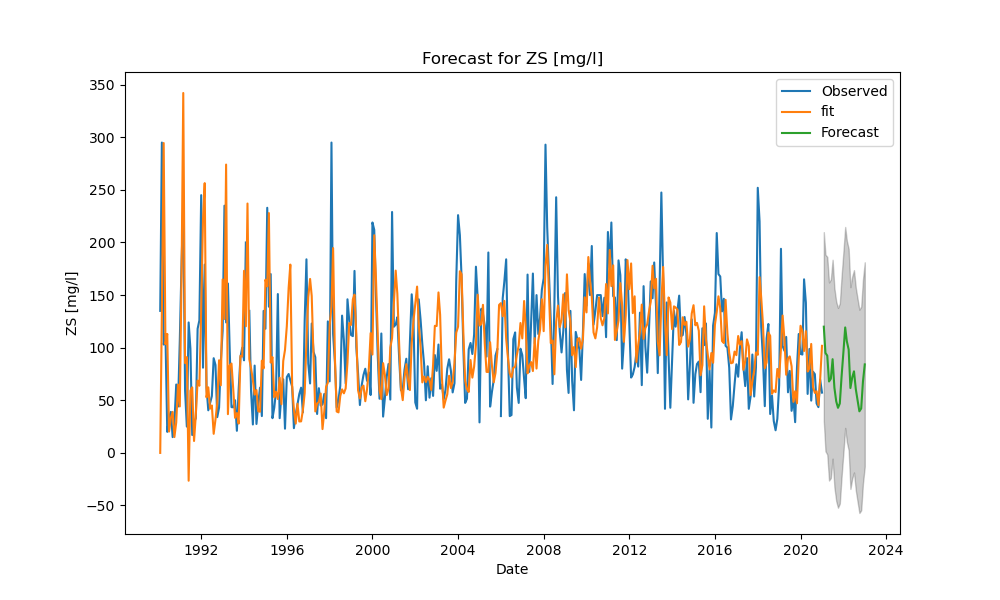

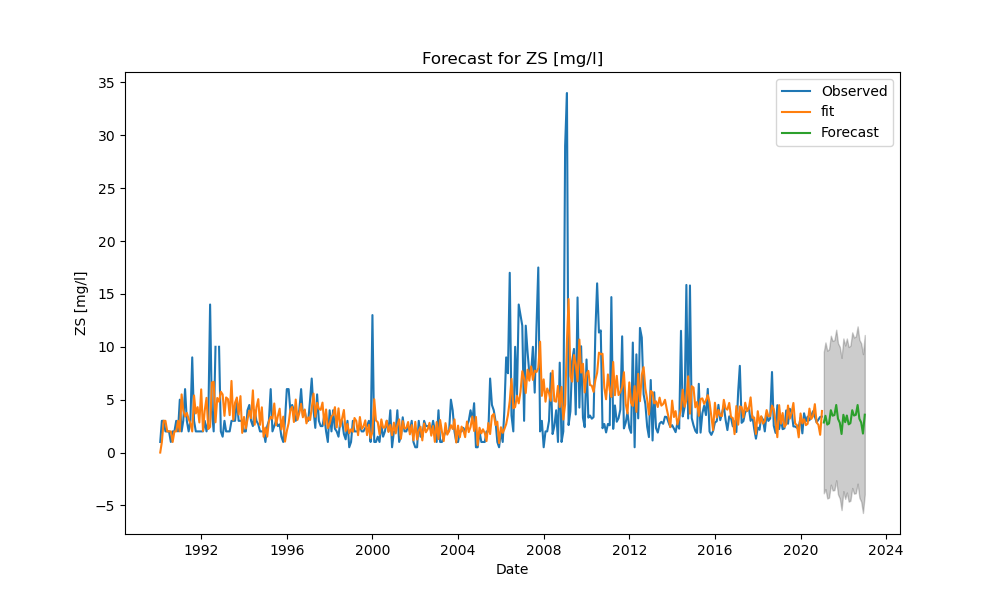

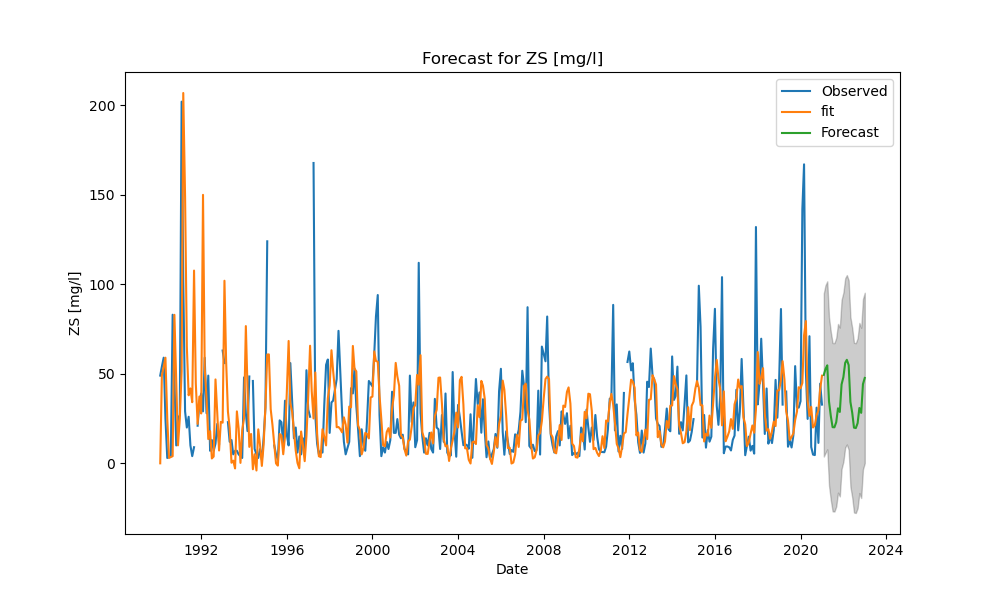

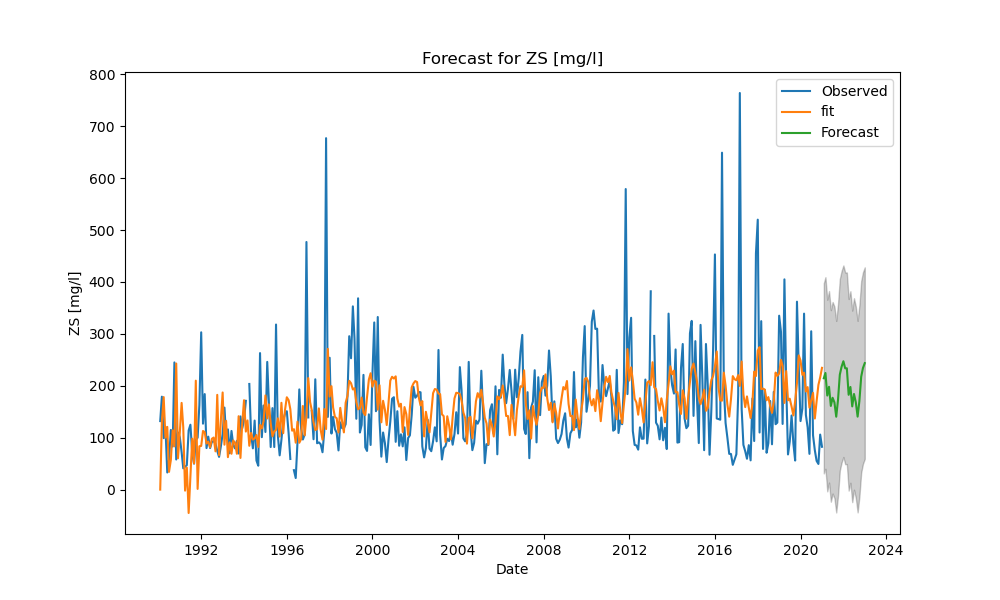

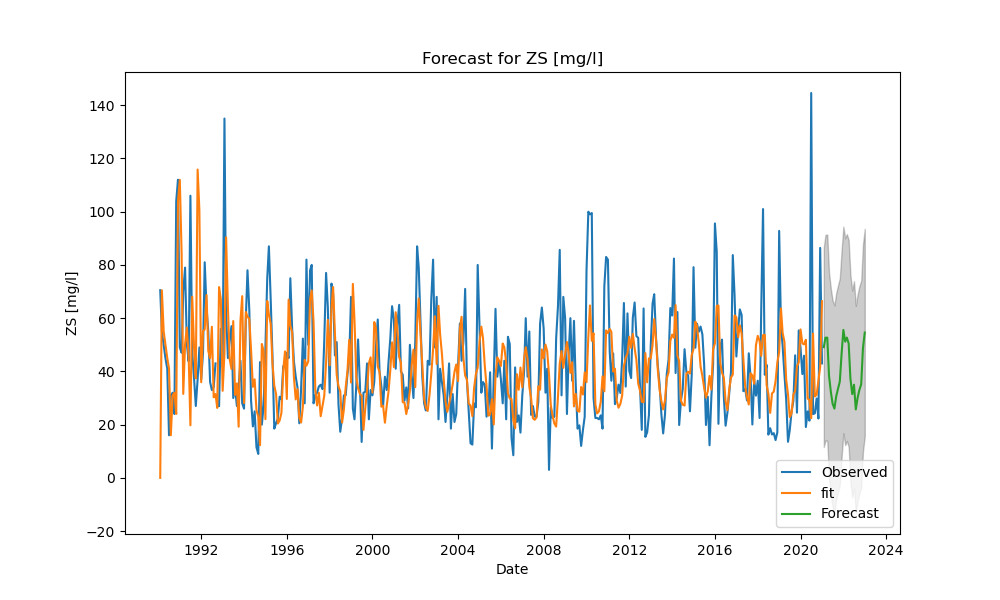

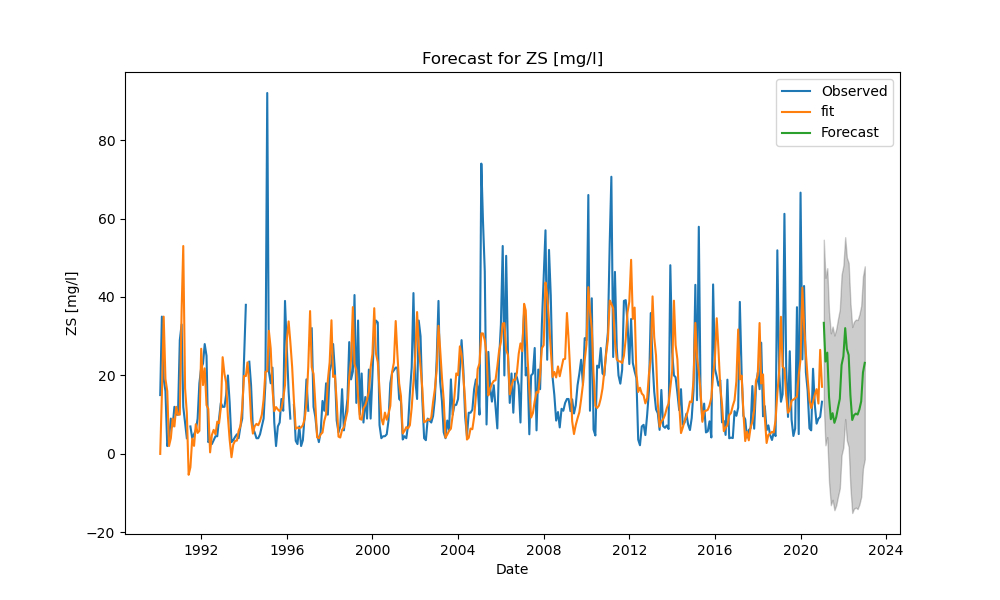

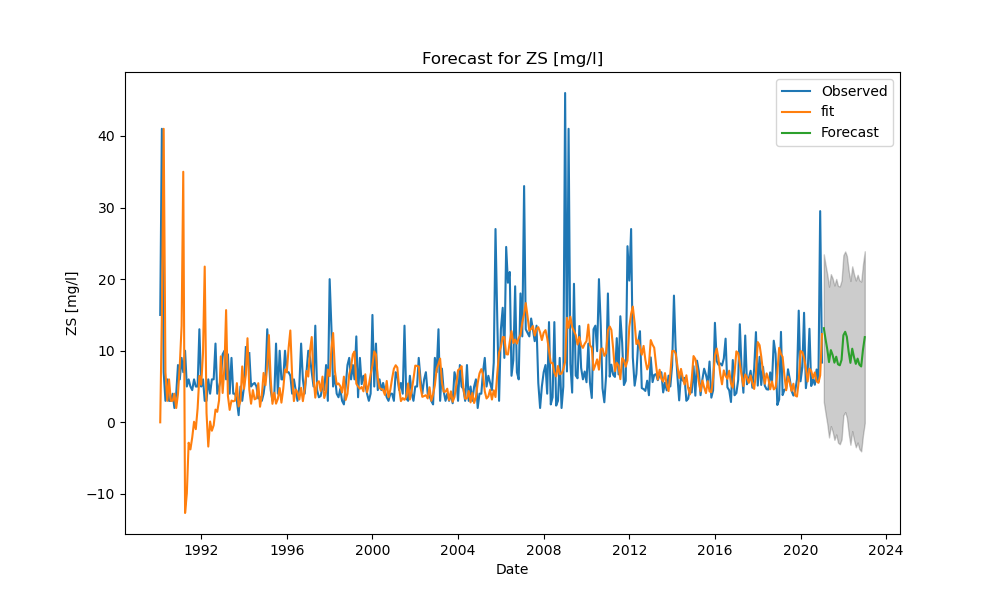

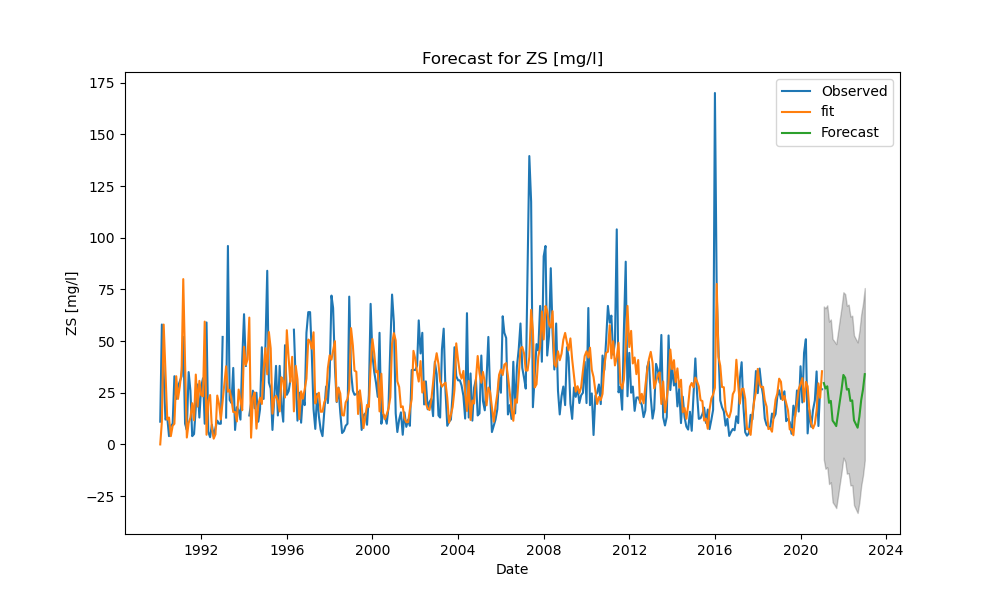

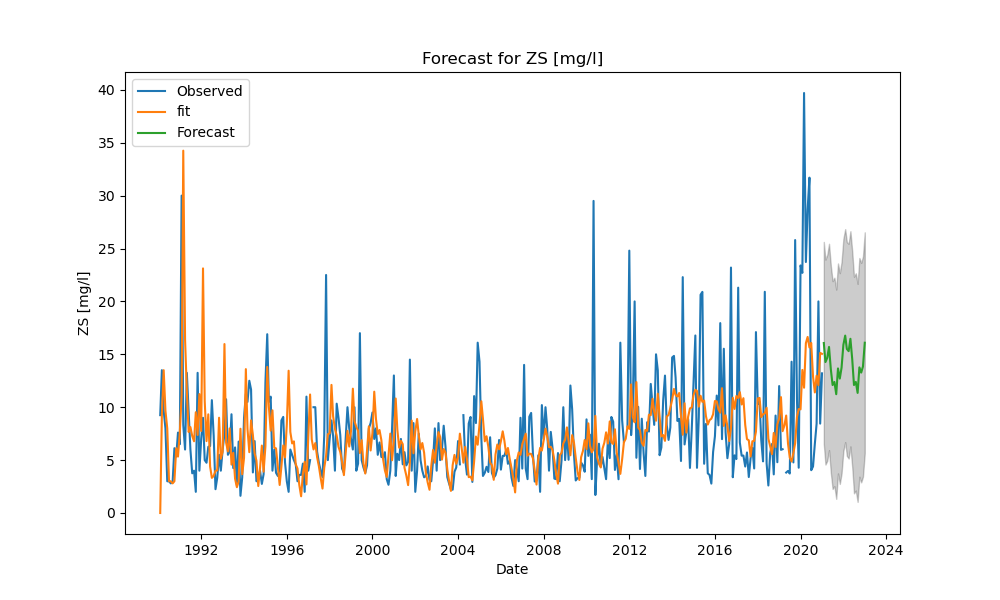

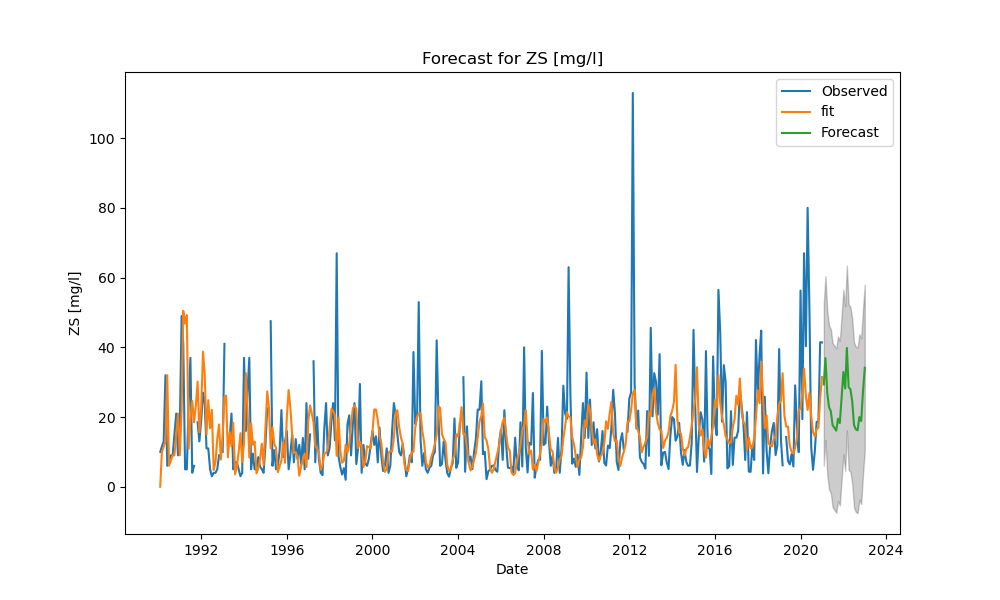

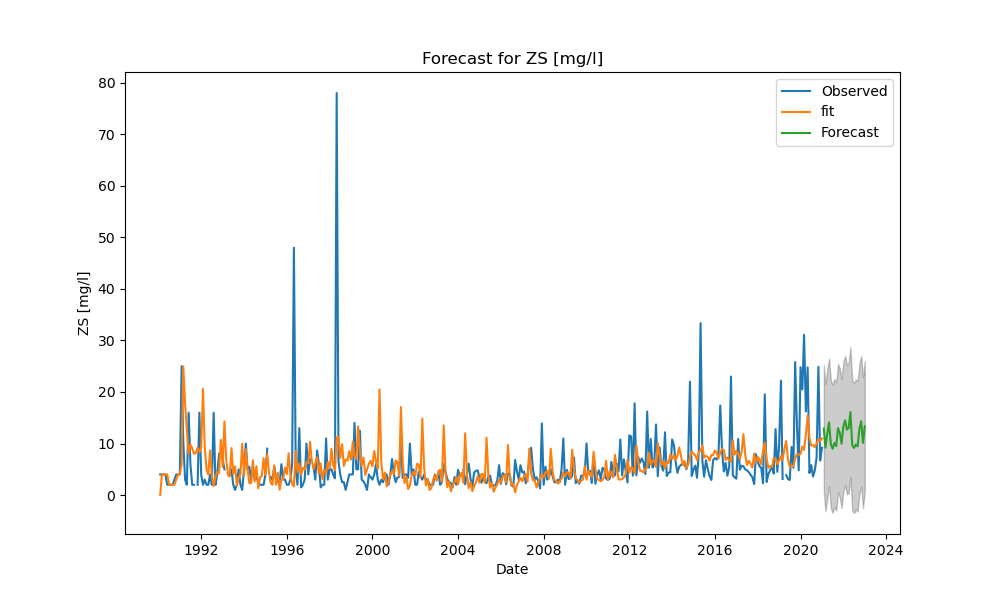

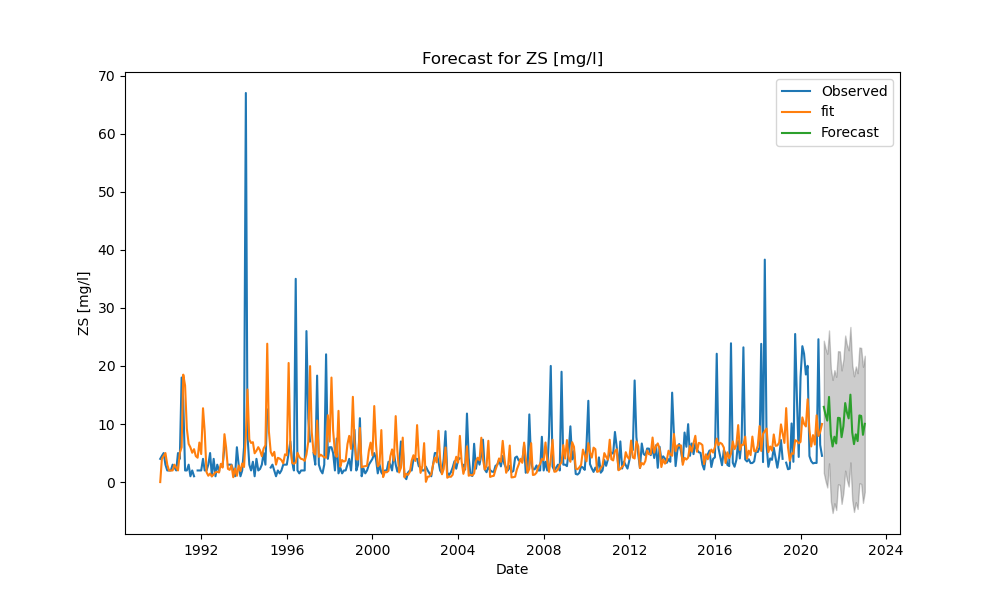

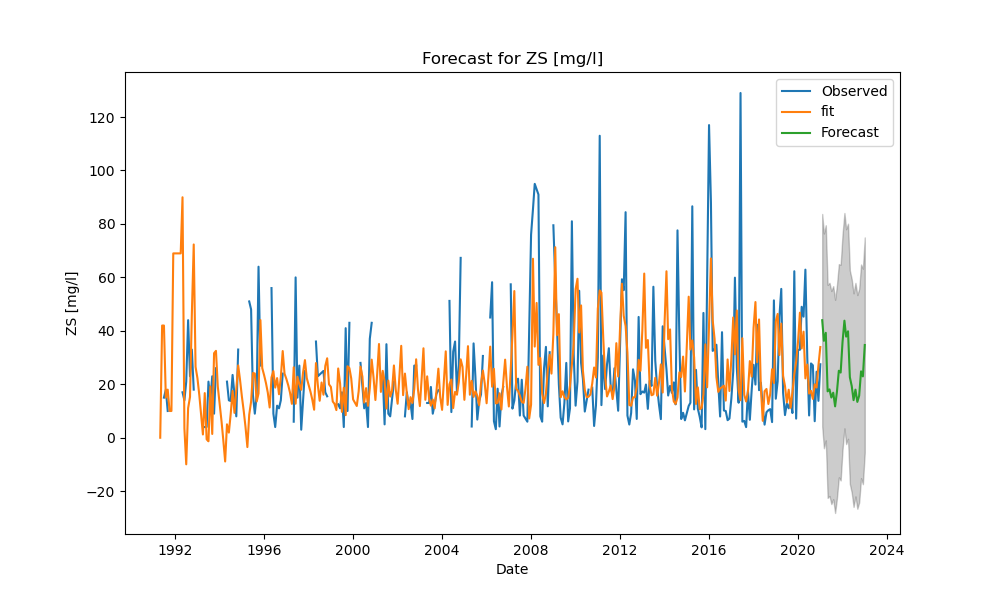

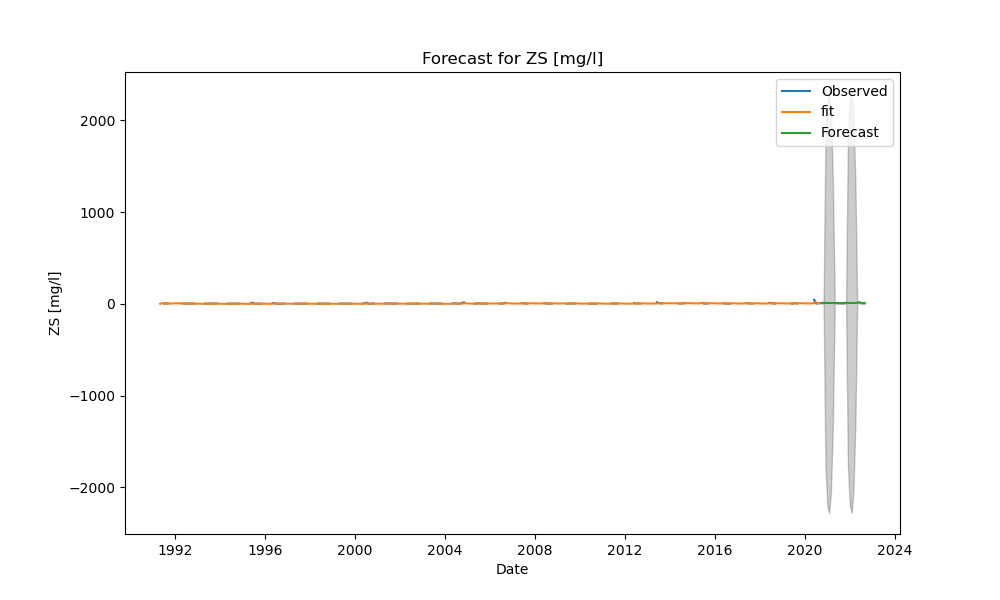

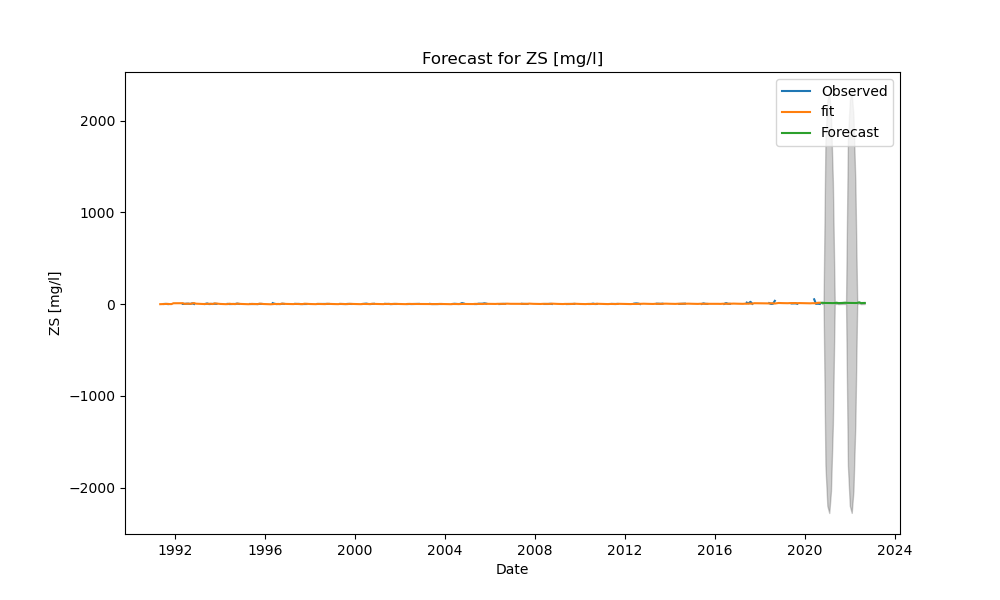

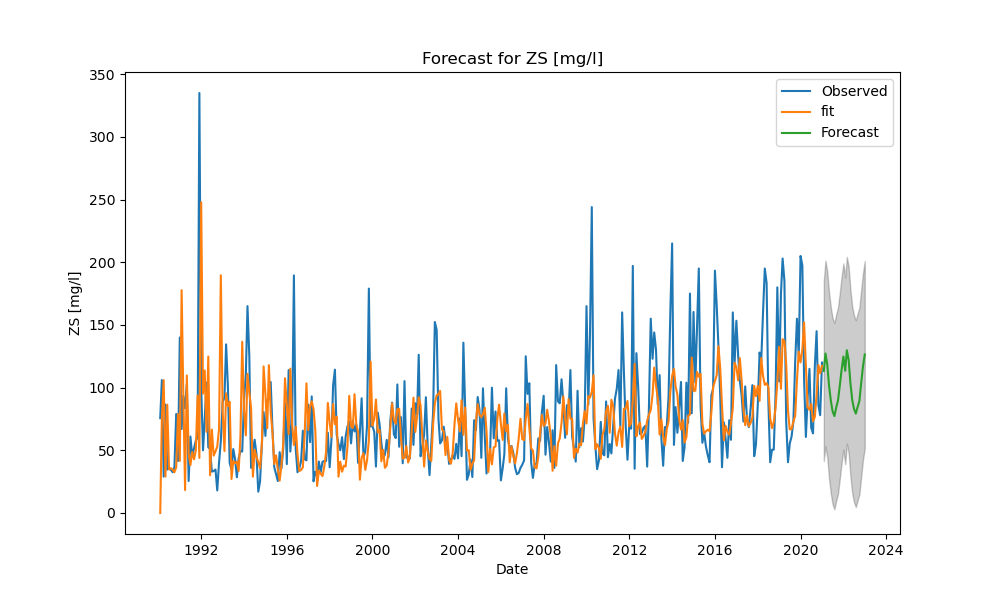

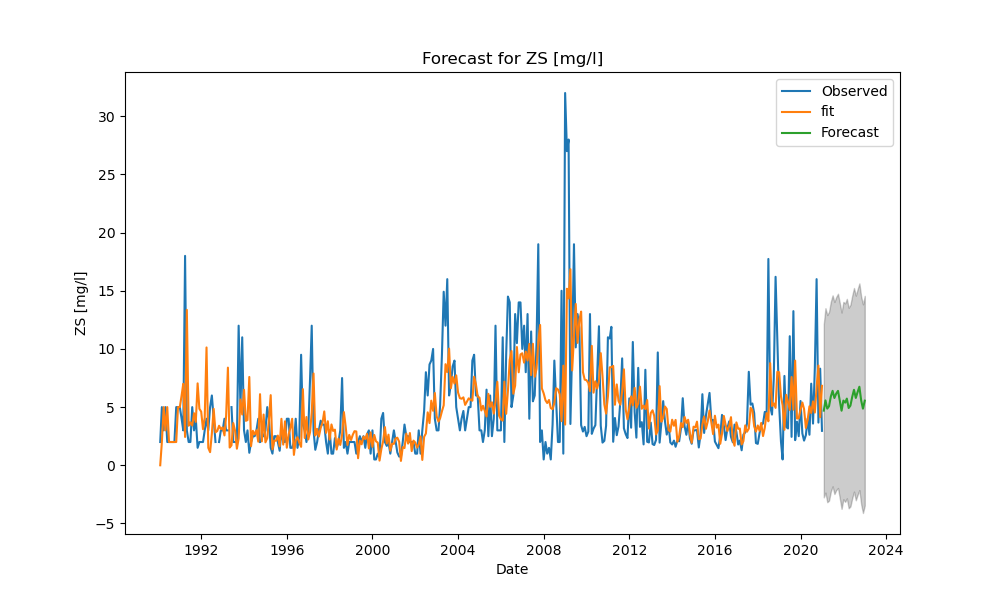

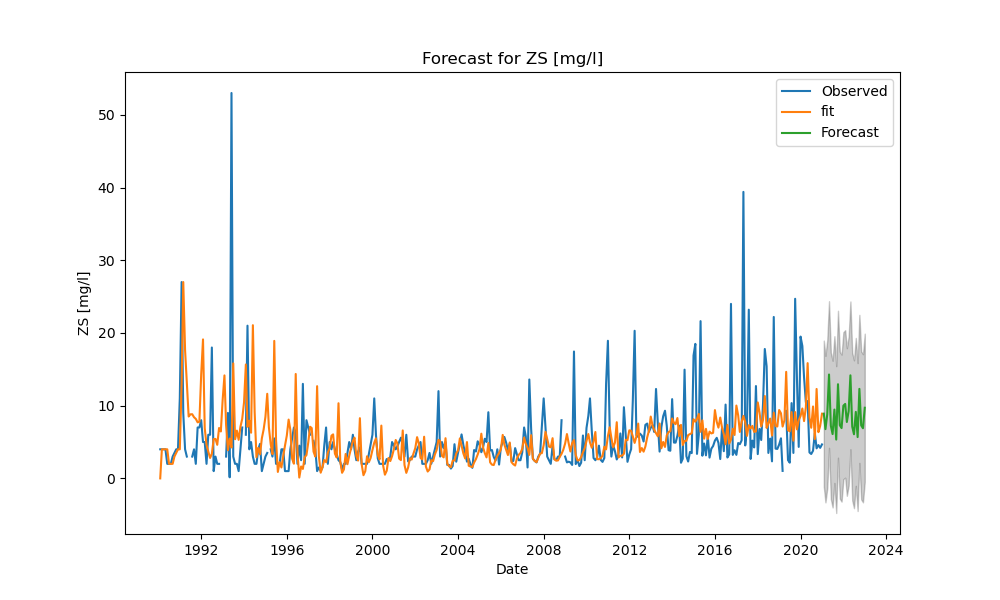

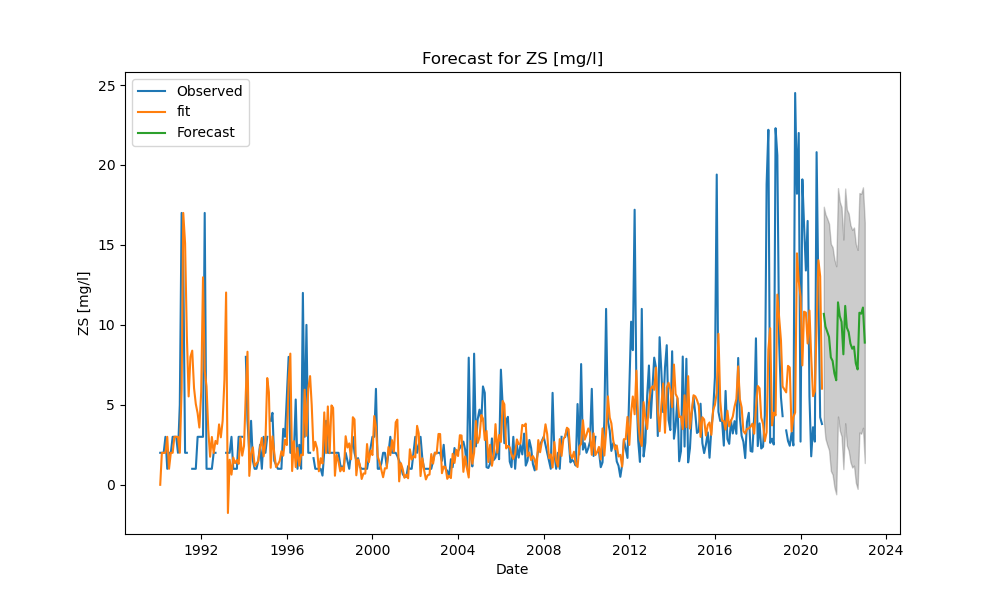

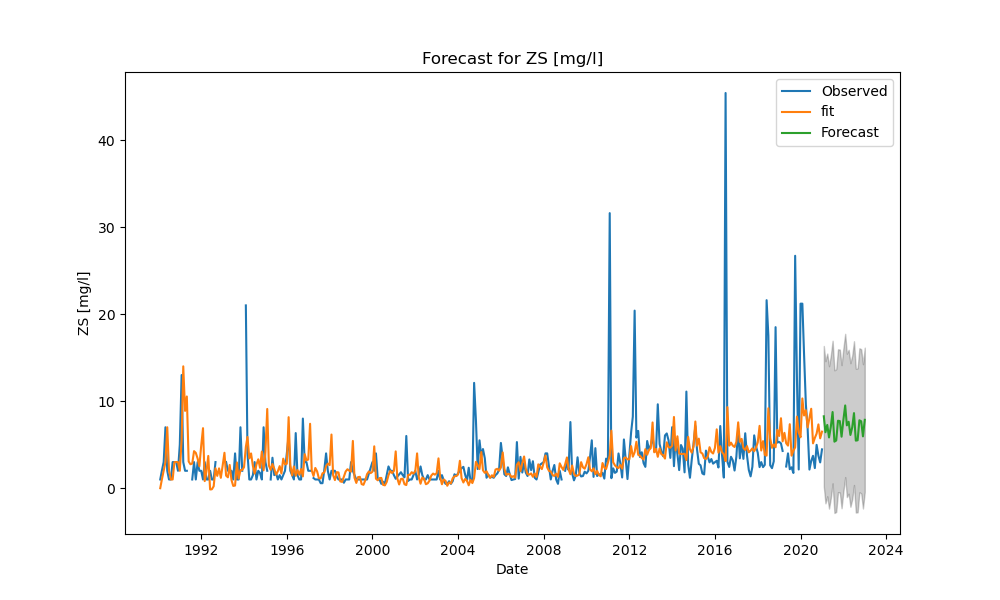

C:\Users\rijkj\AppData\Local\Temp\ipykernel_32132\2335525681.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


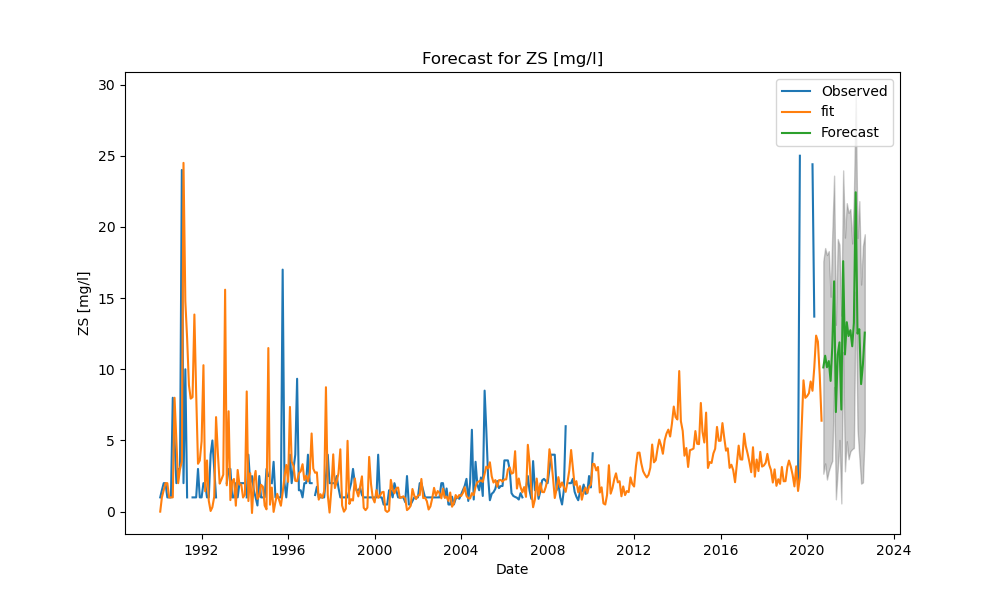

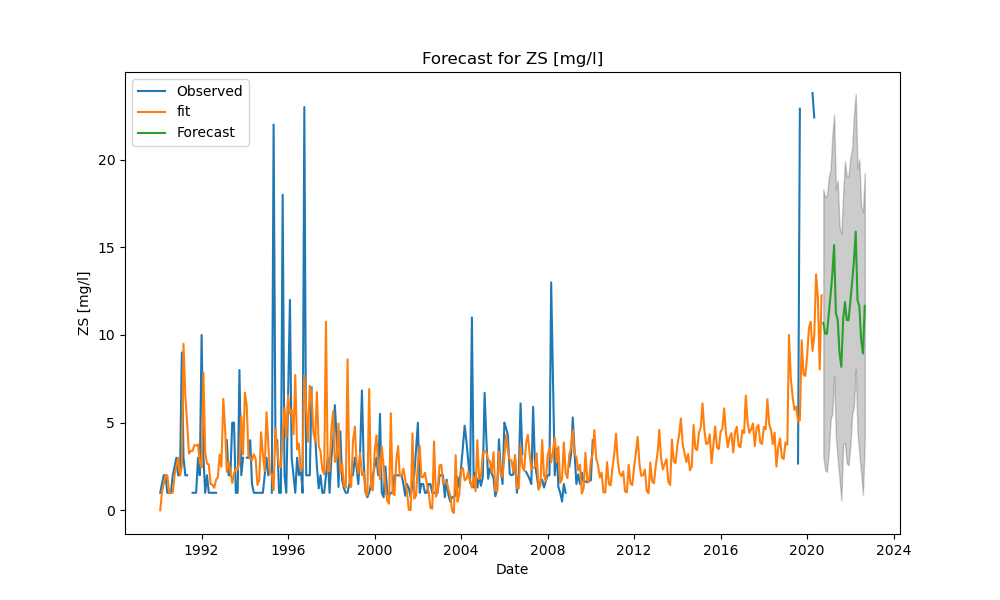

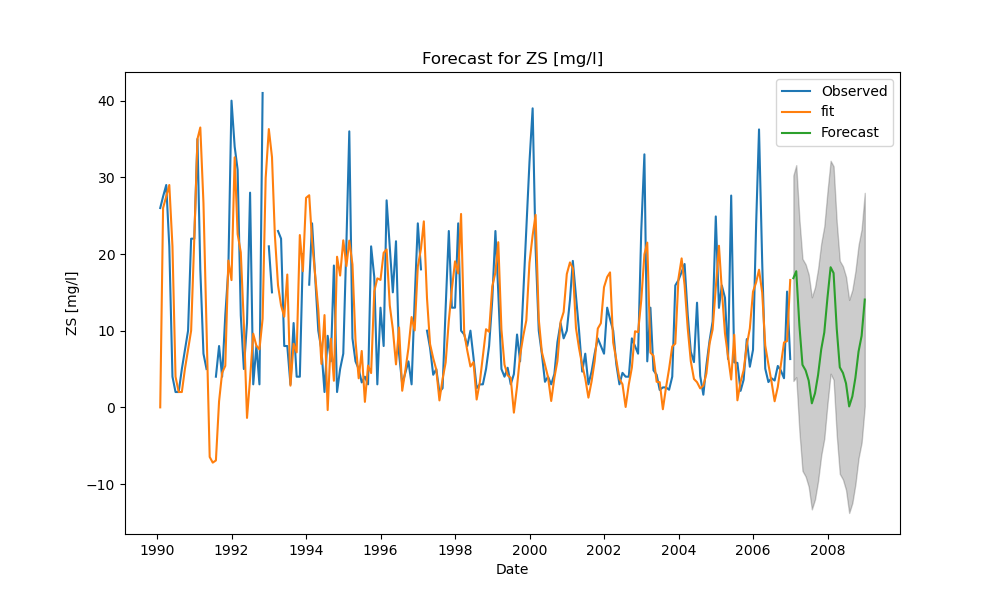

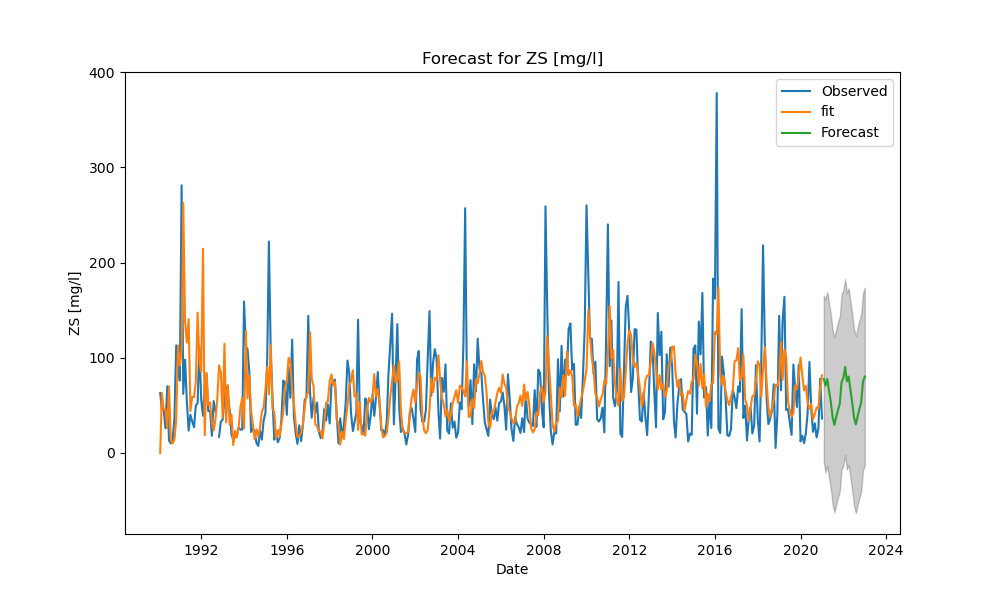

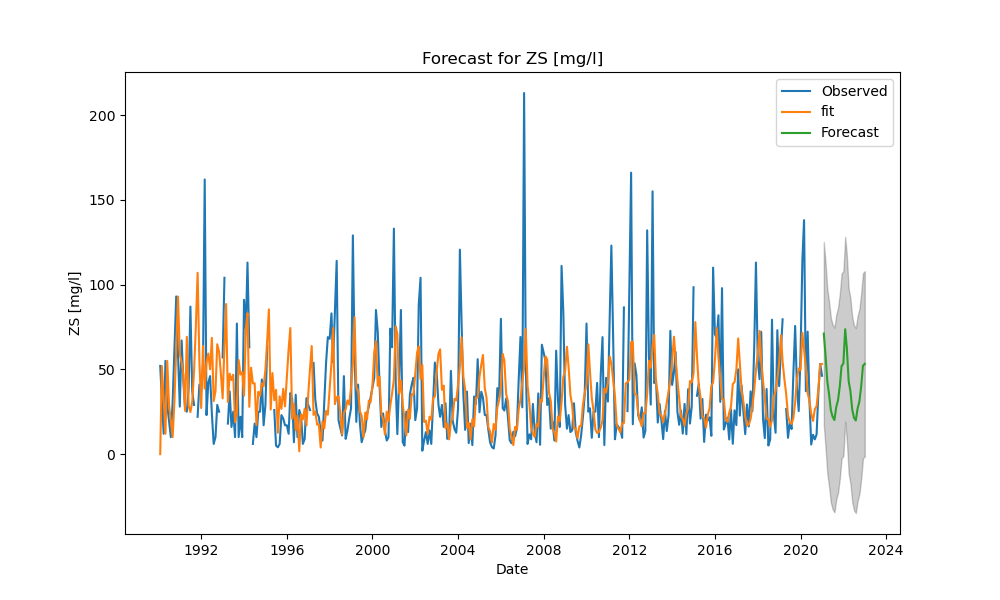

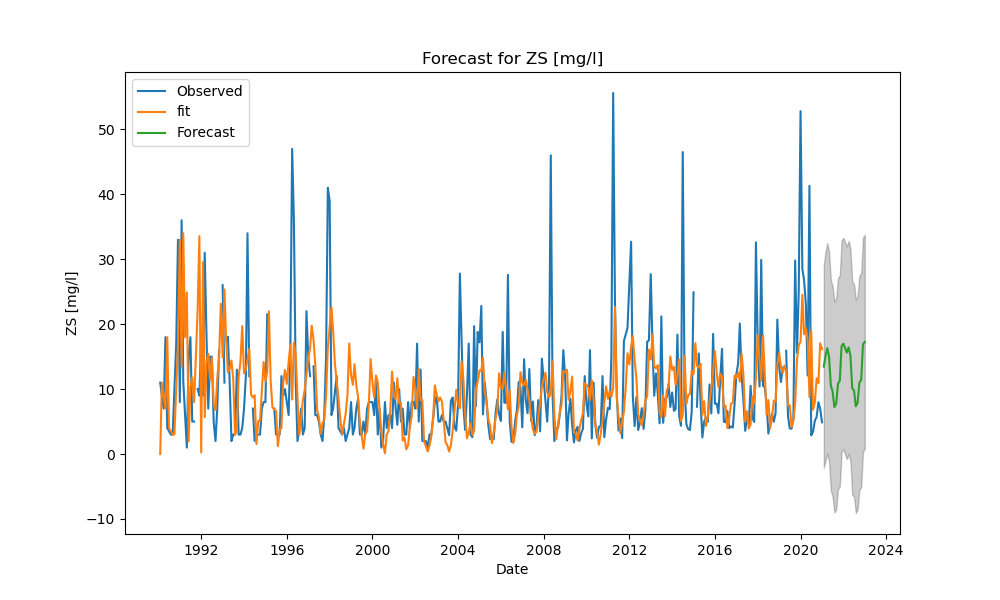

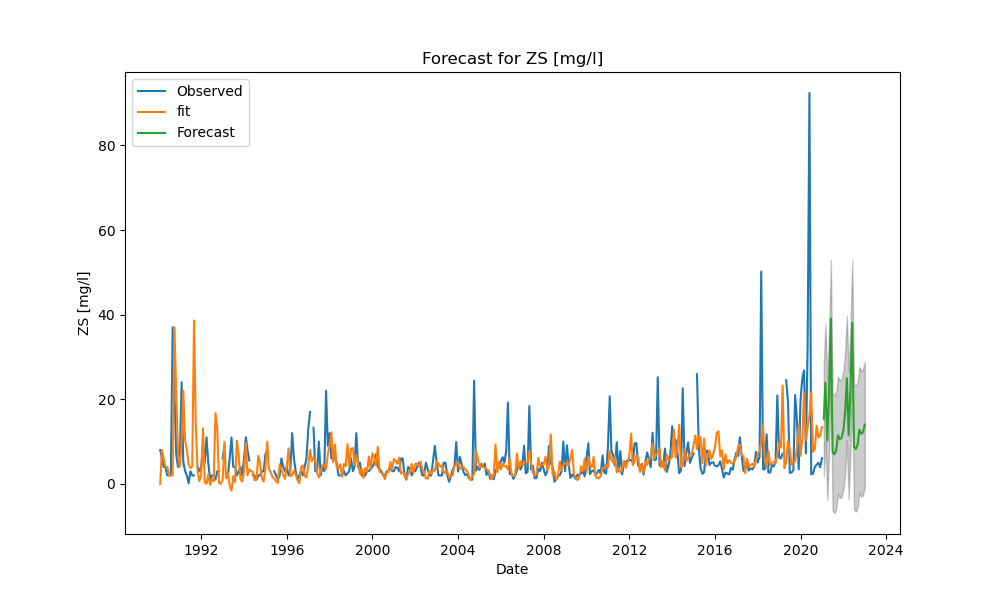

In [120]:
def make_forecasts_and_plot(results, df_resampled, variables_to_forecast):
    forecast_steps = 12  # Define forecast steps
    forecasts = pd.DataFrame()

    for variable in variables_to_forecast:
        forecast = results[variable].get_forecast(steps=forecast_steps)
        forecast_ci = forecast.conf_int()
        
        # Store forecasts
        forecasts[f'{variable}_forecast'] = forecast.predicted_mean
        forecasts[f'{variable}_lower_ci'] = forecast_ci.iloc[:, 0]
        forecasts[f'{variable}_upper_ci'] = forecast_ci.iloc[:, 1]
        
        

        return forecasts

forecast_steps = 24
forecasts = {}

for location in all_results:
    forecasts[location] = pd.DataFrame()
    for variable in all_results[location]:
        forecast = all_results[location][variable].get_forecast(steps=forecast_steps)
        forecast_ci = forecast.conf_int()
        fittdvalues = all_results[location][variable].fittedvalues

        # Store forecasts
        forecasts[location][f'{variable}_forecast'] = forecast.predicted_mean
        forecasts[location][f'{variable}_lower_ci'] = forecast_ci.iloc[:, 0]
        forecasts[location][f'{variable}_upper_ci'] = forecast_ci.iloc[:, 1]

        if variable == 'ZS [mg/l]':
            plt.figure(figsize=(10, 6))
            plt.plot(location_dict[location][variable], label='Observed')
            plt.plot(fittdvalues, label='fit')
            plt.plot(forecast.predicted_mean, label='Forecast')
            plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
            plt.title(f'Forecast for {variable}')
            plt.xlabel('Date')
            plt.ylabel(variable)
            plt.legend()
            plt.show()